In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "notebooks"
    cd(joinpath(@__DIR__, "../"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Desktop/Doktor/MorphoMolMonteCarlo`


In [2]:
function energy(R) 
    [0.0, 1.0, 0.0] ⋅ (R*[0.0, 1.0, 0.0])
end

function energy_gradient!(∇E, R)
    ∇E = [-R[3,2], 0.0, -R[1,2]]
    ∇E
end

σ = 1.0
draw_perturbation! = (p) -> for i in 1:length(p) p[i] = σ * randn(eltype(p)) end

inner_product = (p) -> p ⋅ p

#11 (generic function with 1 method)

In [3]:
T = 0.1
ε = 0.01
p = [0.0, 0.0, 0.0]
L = 25
β = 1.0 / T

10.0

In [11]:
hmc = MorphoMol.LieHmc.HamiltonianMonteCarlo(energy, energy_gradient!, inner_product, draw_perturbation!, β, L, ε)
R = exp(Rotations.RotationVecGenerator((rand(3) .* pi)...))
p = [0.0, 0.0, 0.0]
iterations = 100000

100000

In [13]:
states, accepted_steps = MorphoMol.LieHmc.simulate!(hmc, R, p, iterations);

In [14]:
state_coordinates = [R * [0.0, 1.0, 0.0] for R in states]
xs = [c[1] for c in state_coordinates]
ys = [c[2] for c in state_coordinates]
zs = [c[3] for c in state_coordinates];


In [15]:
accepted_steps / iterations

0.53464

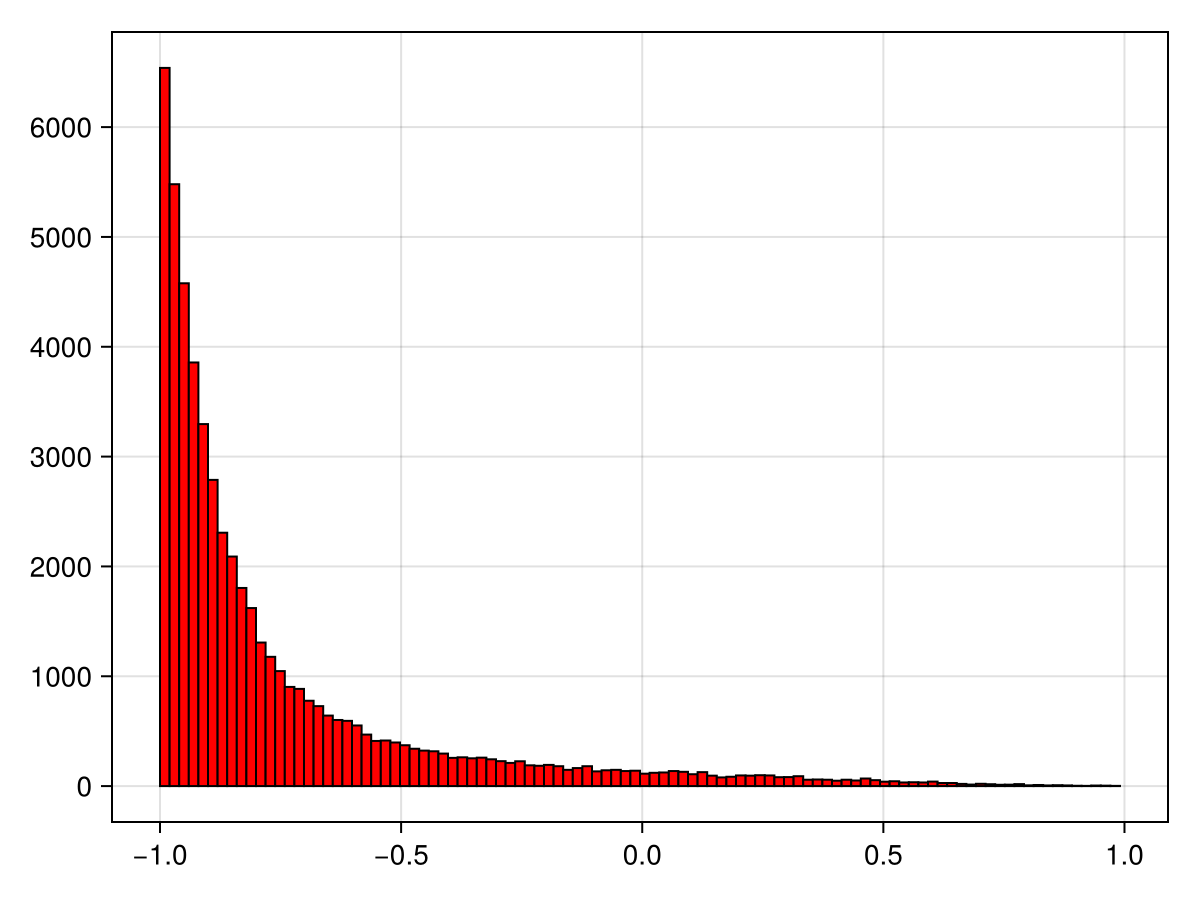

In [16]:
f = Figure()
hist(f[1, 1], ys, bins = 100, color = :red, strokewidth = 1, strokecolor = :black)
f